## Content-based Filtering - Simple

In [1]:
import pandas as pd
import numpy as np

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics.pairwise import cosine_similarity

## Step 1 : Prepare the data

In [2]:
## Case : ada 3 kelas di SA; WM, DM, DS.
doc_WM = 'In this class, we are going to build dinamic website and mobile apps'
doc_DM = 'In this class, we are going to promote product to segmented market'
doc_DS = 'In this class, we are going to build recommender system'

documents = [doc_WM, doc_DM, doc_DS]

## Step 2 : Use CountVectorizer

In [3]:
count_vectorizer = CountVectorizer(stop_words='english')

matrix = count_vectorizer.fit_transform(documents)

In [4]:
## tambahan : Melihat kegunaan count vectorizer

doc_array = matrix.toarray()
df_mat = pd.DataFrame(doc_array, columns=count_vectorizer.get_feature_names(), index=['doc_WM', 'doc_DM', 'doc_DS'])
df_mat

,apps,build,class,dinamic,going,market,mobile,product,promote,recommender,segmented,website
doc_WM,1,1,1,1,1,0,1,0,0,0,0,1
doc_DM,0,0,1,0,1,1,0,1,1,0,1,0
doc_DS,0,1,1,0,1,0,0,0,0,1,0,0


## Step 3 : Menghitung Cosine Similarity

In [5]:
import seaborn as sns

<AxesSubplot:>

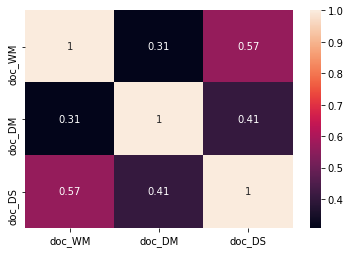

In [6]:
cscore = cosine_similarity(matrix)
sns.heatmap(cscore, annot=True,
            xticklabels=df_mat.index,
            yticklabels=df_mat.index)

## Step 4 : Show the recommendation

In [11]:
class_taken = int(input('What Class have you take?\n0 - WM\n1 - DM\n2 - DS\n'))

df_score = pd.DataFrame(cscore)
urutan_rec = list(df_score[class_taken].sort_values(ascending=False).index)[1:]
list_kelas = ['Web & Mobile', 'Digital Marketing', 'Data Science']

kelas_recom = []
for i in urutan_rec:
    kelas_recom.append(list_kelas[i])
    
print(f'Because you took {list_kelas[class_taken]} class, here are similar class for you!')
for i in range(len(kelas_recom)):
      print(f'{i+1}. {kelas_recom[i]}')

What Class have you take?
0 - WM
1 - DM
2 - DS
1
Because you took Digital Marketing class, here are similar class for you!
1. Data Science
2. Web & Mobile


## Anime Recommendation System

In [2]:
anime = pd.read_csv(r"C:\Users\Rahmat\Documents\Shift Academy\Batch 10\dataset\anime.csv")
anime.head()

,anime_id,name,genre,type,episodes,rating,members
0,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630
1,5114,Fullmetal Alchemist: Brotherhood,"Action, Adventure, Drama, Fantasy, Magic, Mili...",TV,64,9.26,793665
2,28977,Gintama°,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.25,114262
3,9253,Steins;Gate,"Sci-Fi, Thriller",TV,24,9.17,673572
4,9969,Gintama&#039;,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.16,151266


In [3]:
anime.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12294 entries, 0 to 12293
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   anime_id  12294 non-null  int64  
 1   name      12294 non-null  object 
 2   genre     12232 non-null  object 
 3   type      12269 non-null  object 
 4   episodes  12294 non-null  object 
 5   rating    12064 non-null  float64
 6   members   12294 non-null  int64  
dtypes: float64(1), int64(2), object(4)
memory usage: 672.5+ KB


In [4]:
anime.isna().sum()

anime_id      0
name          0
genre        62
type         25
episodes      0
rating      230
members       0
dtype: int64

In [5]:
anime_notnull = anime.dropna()

In [6]:
cv = CountVectorizer(tokenizer=lambda x:x.split(', '))
by_genre = cv.fit_transform(anime_notnull['genre'])

In [7]:
print(len(cv.get_feature_names()))
print(cv.get_feature_names())

43
['action', 'adventure', 'cars', 'comedy', 'dementia', 'demons', 'drama', 'ecchi', 'fantasy', 'game', 'harem', 'hentai', 'historical', 'horror', 'josei', 'kids', 'magic', 'martial arts', 'mecha', 'military', 'music', 'mystery', 'parody', 'police', 'psychological', 'romance', 'samurai', 'school', 'sci-fi', 'seinen', 'shoujo', 'shoujo ai', 'shounen', 'shounen ai', 'slice of life', 'space', 'sports', 'super power', 'supernatural', 'thriller', 'vampire', 'yaoi', 'yuri']


In [8]:
anime_notnull.head(3)

,anime_id,name,genre,type,episodes,rating,members
0,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630
1,5114,Fullmetal Alchemist: Brotherhood,"Action, Adventure, Drama, Fantasy, Magic, Mili...",TV,64,9.26,793665
2,28977,Gintama°,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.25,114262


In [9]:
coScore_anime = cosine_similarity(by_genre)
coScore_anime

array([[1.        , 0.18898224, 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.18898224, 1.        , 0.28571429, ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.28571429, 1.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 1.        , 1.        ,
        1.        ],
       [0.        , 0.        , 0.        , ..., 1.        , 1.        ,
        1.        ],
       [0.        , 0.        , 0.        , ..., 1.        , 1.        ,
        1.        ]])

In [10]:
anime_liked = input('What anime do you like? ')
new_anime = anime_notnull.reset_index()
index_liked = new_anime[new_anime['name']==anime_liked].index
df_score = pd.DataFrame(coScore_anime)
urutan_rec = list(df_score[index_liked[0]].sort_values(ascending=False).drop(index_liked[0]).index)
list_anime = list(new_anime['name'].values)

anime_recom = []
for i in urutan_rec :
    anime_recom.append(list_anime[i])
    
print(f'because you like {anime_liked}, here are similar anime just for you!')
for i in range(len(anime_recom[:10])):
    print(f"{i+1}. {anime_recom[i]} (Genre: {new_anime.loc[urutan_rec[i], 'genre']})")

What anime do you like? Naruto
because you like Naruto, here are similar anime just for you!
1. Naruto: Shippuuden Movie 3 - Hi no Ishi wo Tsugu Mono (Genre: Action, Comedy, Martial Arts, Shounen, Super Power)
2. Naruto: Shippuuden Movie 4 - The Lost Tower (Genre: Action, Comedy, Martial Arts, Shounen, Super Power)
3. Naruto Shippuuden: Sunny Side Battle (Genre: Action, Comedy, Martial Arts, Shounen, Super Power)
4. Naruto x UT (Genre: Action, Comedy, Martial Arts, Shounen, Super Power)
5. Naruto Soyokazeden Movie: Naruto to Mashin to Mitsu no Onegai Dattebayo!! (Genre: Action, Comedy, Martial Arts, Shounen, Super Power)
6. Naruto: Shippuuden (Genre: Action, Comedy, Martial Arts, Shounen, Super Power)
7. Boruto: Naruto the Movie - Naruto ga Hokage ni Natta Hi (Genre: Action, Comedy, Martial Arts, Shounen, Super Power)
8. Boruto: Naruto the Movie (Genre: Action, Comedy, Martial Arts, Shounen, Super Power)
9. Katekyo Hitman Reborn! (Genre: Action, Comedy, Shounen, Super Power)
10. Kyutai